

## **Evaluation of Vision-Language Models for AI4Safety Use Cases**

### **Introduction**

This report evaluates lightweight Vision-Language Models (VLMs) suitable for real-time industrial safety applications under the AI4Safety initiative. The use cases involve camera-based real-time monitoring where models must interpret visual scenes, answer safety-related questions, and provide contextual descriptions (captioning). 

**Ideal VLMs should support Visual Question Answering (VQA), image captioning, low-latency inference, and adaptability via fine-tuning.**

---

### **Selection Criteria**

The models were shortlisted and tested based on the following criteria:

* **VQA Capability**: Ability to understand and answer questions grounded in image context
* **Captioning Support**: Ability to generate contextual and relevant descriptions of scenes
* **Lightweight**: Model size under \~7B parameters for real-time feasibility
* **Fine-tunability**: Ease of adapting to domain-specific visual safety data

---

### **Vision Language Models in Consideration**

* **LLaVA-1.5-7B** is a powerful vision-language assistant that combines a vision encoder with a Vicuna-7B language model, excelling at tasks like image captioning, visual question answering, and multimodal instruction following, making it ideal for educational tools, accessibility aids, and interactive assistants.

* **Qwen2.5-VL-7B**, developed by Alibaba, integrates strong visual reasoning with the multilingual and instruction-tuned capabilities of the Qwen2.5-7B model, making it especially suited for document understanding, chart interpretation, and detailed image-based dialogue across languages.

* **OpenFlamingo-4B** is an open-source replication of DeepMind’s Flamingo model, designed for few-shot multimodal learning; it's capable of handling visual question answering and image-grounded conversation with minimal training data, which makes it useful for research and applications requiring flexibility with limited examples.

* **MiniGPT-4-7B** mimics GPT-4-Vision by combining a BLIP-2 visual encoder with a Vicuna-7B language model, enabling sophisticated reasoning over images and allowing users to engage in descriptive, story-like, or analytical conversations about visual content.

* **BLIP-2 (Flan-T5-xl)** is a lightweight and efficient vision-language model that uses a visual encoder and a frozen Flan-T5-xl language model; it performs well on captioning and simple VQA tasks, making it great for applications with limited compute budgets or fast inference needs.

* **SmolVLM-Instruct** is a tiny, instruction-tuned vision-language model built for ultra-low resource environments, offering basic image understanding and question answering capabilities that are well-suited for on-device assistants, mobile apps, or edge AI deployments.

* **Florence-2 (0.23B, 0.77B)** is a multitask VLM by Microsoft trained on a massive unified dataset. It supports captioning, detection, and segmentation. Accuracy is strong, even zero-shot, but latency on CPU remains a limitation.

* **BLIP (Salesforce)** is a captioning model with a ViT-base encoder and transformer decoder. While fast and lightweight, its captions tend to be generic compared to safety-optimized models.

* **Moondream v2** is a compact 1.93B multimodal model trained with reinforcement learning from human feedback (RLHF), optimized for visual grounding and question answering.

* **InternVL2-2B** is a 2.2B vision-language model with a 300M ViT and 1.8B language decoder, licensed under MIT. It is suitable for grounded visual tasks with moderate performance on CPU.

---

### ***GPU + CPU Vision-Language Models***

| Model               | Core Architecture                                        | Capabilities                                 | Size       | Real-Time Suitability | License         | Safety/Benchmarks                          |
|--------------------|----------------------------------------------------------|----------------------------------------------|------------|------------------------|------------------|---------------------------------------------|
| LLaVA-1.5-7B        | CLIP ViT-L/14 + Vicuna/LLaMA-2 7B                        | Captioning, VQA, dialog                      | ~7B + ViT  | Moderate (GPU)         | LLaMA-2 Comm.     | VQA, OKVQA                                |
| Qwen2.5-VL-7B       | Custom ViT + Qwen2.5 7B                                  | OCR, charts, reasoning, bounding boxes       | ~7B        | Moderate (GPU)         | Apache 2.0        | TextVQA, DocVQA                            |
| OpenFlamingo-4B     | CLIP ViT-L/14 + RedPajama-3B                             | Few-shot VQA, image-text interleaving        | ~4B        | Moderate (GPU)         | Apache-like       | Matches Flamingo                           |
| MiniGPT-4-7B        | BLIP-2 (CLIP+Q-Former) + Vicuna-7B                       | Chat-style VQA, captioning                   | ~7B        | Moderate (GPU, partial CPU) | BSD-3      | Complex image queries                      |
| BLIP-2 (Flan-T5-xl) | CLIP ViT + Q-Former + Flan-T5-xl                         | Captioning, VQA                              | ~3.9B      | Heavier (GPU preferred)| MIT              | COCO SOTA, live captioning                 |
| SmolVLM-Instruct    | SigLIP + SmolLM2 1.7B                                    | Captioning, VQA, multi-image reasoning       | ~2B        | High (CPU/GPU, ~5GB RAM)| Apache 2.0        | MMMU 38.8, TextVQA 72.7                    |


---

### ***CPU VLM Variants***

| Model              | Params | Quantization             | CPU Inference Time      | RAM (approx.) | License    |
|-------------------|--------|---------------------------|--------------------------|---------------|------------|
| Florence-2 (base) | 0.23B  | FP16 (default); 8-bit     | Few seconds/image        | ~1–2 GB       | MIT        |
| Florence-2 (large)| 0.77B  | FP16; 8-bit               | Few seconds/image        | ~3–5 GB       | MIT        |
| BLIP (captioning) | ~0.25B | FP16; 8-bit via HF        | ~1–2 s/image (estimated) | ~1–2 GB       | BSD-3      |
| SmolVLM-Instruct  | 2.25B  | FP16/BF16; 4-/8-bit (bnb) | Several seconds/image    | ~5 GB         | Apache 2.0 |
| Moondream v2      | 1.93B  | BF16; 8-bit               | Several seconds/image    | ~4–6 GB       | Apache 2.0 |
| InternVL2-2B      | 2.2B   | FP32/FP16; 8-bit          | Several seconds/image    | ~6–8 GB       | MIT        |

## **Models Tested**

The following models were experimentally evaluated for compatibility with the AI4Safety pipeline:

| Model Name           | VQA | Captioning | Size   | Fine-tuning Support                              | Real-Time Feasibility |
| -------------------- | --- | ---------- | ------ | ------------------------------------------------ | --------------------- |
| **BLIP-2 VQA Base**  | YES   | YES          | \~300M | Moderate (BLIP-2 architecture allows adaptation) | YES                     |
| **Florence-2 Base**  | YES   | YES         | \~500M | Experimental fine-tuning via HuggingFace/ONNX    | YES                     |
| **SmolVLM (500M)**   | YES   | NO          | \~500M | Instruction-tuned, fast inference                | YES                     |
| **ViLT Base-32**     | YES   | NO          | \~86M  | Harder to fine-tune, no visual encoder           | YES (but lower quality) |
| **GIT-Base-TextVQA** | YES   | YES          | \~300M | Pretrained on TextVQA, decent OCR support        | YES                     |

---


In [57]:
!brew install python@3.11
!python3.11 -m venv siemens-env
!source siemens-env/bin/activate
!pip install transformers


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:20fa657858e44a4b39171d6e4111f8a9716eb62a78ebbd1491d94f90bb7b830a
######################################################################### 100.0%                            37.5%#########################             86.0%
==> Pouring portable-ruby-3.4.5.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
abpoa: SIMD-based C library for fast partial order alignment using adaptive band
act_runner: Action runner for Gitea based on Gitea's fork of act
add-determinism: Build postprocessor to reset metadata fields for build reproducibility
addons-linter: Firefox Add-ons linter, written in JavaScript
air: Fast and opinionated formatter for R code
alej

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


#### Imports and installations

In [3]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install --upgrade transformers tokenizers
!pip install pillow
!pip install requests

  Using cached transformers-4.53.2-py3-none-any.whl.metadata (40 kB)
  Using cached tokenizers-0.21.2-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
Using cached transformers-4.53.2-py3-none-any.whl (10.8 MB)
Using cached tokenizers-0.21.2-cp39-abi3-macosx_11_0_arm64.whl (2.7 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling transformers-4.37.2:
      Successfully uninstalled transformers-4.37.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [transformers] [transformers]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.3 MB/s eta 0:00:00a 0:00:01


In [ ]:
!pip install einops timm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached einops-0.8.1-py3-none-any.whl.metadata (13 kB)
Using cached einops-0.8.1-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [timm]2/3 [timm]vision]


In [21]:
!pip install psutil

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [50]:
!pip install accelerate

Python(65638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [9]:
#memory benchmarking helper
import psutil
import os

def get_memory_usage_mb():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # in MB

In [10]:
import time
import requests
from PIL import Image
import torch
from transformers import BitsAndBytesConfig, pipeline

#### Images and prompts

In [11]:
TEST_IMAGES = [
    "./images/Construction.jpeg",
    "./images/crane image.jpg",
    "./images/traffic.jpg"
]

# Safety prompts for testing
SAFETY_PROMPTS = [
    "Analyze this industrial/construction site image. Identify any safety violations including: people without hardhats, people without safety vests, unauthorized personnel in restricted zones, or vehicles too close to workers. List all safety hazards you detect.",
    
    "You are a safety inspector. Examine this image for workplace safety violations. Report: 1) Missing PPE (hardhats, safety vests, safety boots), 2) Restricted area violations, 3) Unsafe vehicle-pedestrian distances. Be specific about what you observe.",
    
    "Industrial safety check: Look for safety hazards in this image including workers without proper protective equipment, people in danger zones, and unsafe proximity between vehicles and personnel. Provide a safety assessment.",
]

SAFETY_QUESTIONS = [
   "Are there any people in the image not wearing hardhats?",
   "Do all visible workers have safety vests on?",
   "Is anyone in the image located inside a restricted or unauthorized zone?",
   "Are there any vehicles dangerously close to workers in the image?",
   "Is anyone missing required PPE like safety boots, vests, or helmets?",
   "Is there an unsafe distance between any vehicle and a person?",
   "Are all workers following proper industrial safety protocols?",
   "Is anyone working in an area they should not be in?",
   "Are there any visible safety violations in this image?",
   "Does the image show any hazards that could pose a threat to worker safety?"
]



#### Adding images in JPEG format to a list

In [12]:
images = [Image.open(image) for image in TEST_IMAGES]

### [Blip2-VQA-Base](https://huggingface.co/Salesforce/blip-vqa-base)

In [5]:
from transformers import BlipProcessor, BlipForConditionalGeneration, BlipForQuestionAnswering

In [6]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [8]:
total_start_time = time.time()
before_mem = get_memory_usage_mb()

for image in images:
    image_start_time = time.time()
    print(f"Processing Image: {image.filename}")

    for prompt in SAFETY_QUESTIONS:
        prompt_start_time = time.time()

        # Inference
        inputs = processor(image, prompt, return_tensors="pt")
        outputs = model.generate(**inputs)
        outputs = processor.batch_decode(outputs, skip_special_tokens=True)

        prompt_end_time = time.time()

        # Output and benchmark
        print(f"Prompt: {prompt}")
        print(f"Response: {outputs[0]}")
        print(f"Prompt Inference Time: {prompt_end_time - prompt_start_time:.2f} seconds")
        print("-" * 80)

    image_end_time = time.time()
    print(f"Image Processing Time: {image_end_time - image_start_time:.2f} seconds")
    print("=" * 80)

total_end_time = time.time()

after_mem = get_memory_usage_mb()
print(f"Memory used (CPU RAM): {after_mem - before_mem:.2f} MB")

print(f"Total Time: {total_end_time - total_start_time:.2f} seconds")


Processing Image: ./images/Construction.jpeg
Prompt: Are there any people in the image not wearing hardhats?
Response: yes
Prompt Inference Time: 0.44 seconds
--------------------------------------------------------------------------------
Prompt: Do all visible workers have safety vests on?
Response: yes
Prompt Inference Time: 0.39 seconds
--------------------------------------------------------------------------------
Prompt: Is anyone in the image located inside a restricted or unauthorized zone?
Response: no
Prompt Inference Time: 0.40 seconds
--------------------------------------------------------------------------------
Prompt: Are there any vehicles dangerously close to workers in the image?
Response: no
Prompt Inference Time: 0.39 seconds
--------------------------------------------------------------------------------
Prompt: Is anyone missing required PPE like safety boots, vests, or helmets?
Response: yes
Prompt Inference Time: 0.40 seconds
----------------------------------

#### [Florence-2 Base](https://huggingface.co/microsoft/Florence-2-base)

In [9]:
from transformers import AutoProcessor, AutoModelForCausalLM 

In [12]:
model1 = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True)
processor1 = AutoProcessor.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True)

In [ ]:
total_start_time = time.time()
before_mem = get_memory_usage_mb()

for image in images:
    image_start_time = time.time()
    print(f"Processing Image: {image.filename}")
    
    for prompt in SAFETY_QUESTIONS:
        prompt_start_time = time.time()
        
        # Inference
        inputs = processor1(text=prompt, images=image, return_tensors="pt")
        generated_ids = model1.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_new_tokens=1024,
            num_beams=3
        )
        
        generated_text = processor1.batch_decode(generated_ids, skip_special_tokens=True)[0]
        
        prompt_end_time = time.time()
        
        # Output and benchmark
        print(f"Prompt: {prompt}")
        print(f"Raw Response: {generated_text}")
        print(f"Prompt Inference Time: {prompt_end_time - prompt_start_time:.2f} seconds")
        print("-" * 80)
    
    image_end_time = time.time()
    print(f"Image Processing Time: {image_end_time - image_start_time:.2f} seconds")
    print("=" * 80)

total_end_time = time.time()
print(f"Total Time: {total_end_time - total_start_time:.2f} seconds")

after_mem = get_memory_usage_mb()
print(f"Memory used (CPU RAM): {after_mem - before_mem:.2f} MB")

Processing Image: ./images/Construction.jpeg
Prompt: Are there any people in the image not wearing hardhats?
Raw Response: any peoplehardhats
Prompt Inference Time: 3.22 seconds
--------------------------------------------------------------------------------
Prompt: Do all visible workers have safety vests on?
Raw Response: visible workers have safety vests
Prompt Inference Time: 2.40 seconds
--------------------------------------------------------------------------------
Prompt: Is anyone in the image located inside a restricted or unauthorized zone?
Raw Response: inside a restricted or unauthorized zone
Prompt Inference Time: 2.26 seconds
--------------------------------------------------------------------------------
Prompt: Are there any vehicles dangerously close to workers in the image?
Raw Response: any vehicles dangerously close to workersany vehicles dangerous close toworkers
Prompt Inference Time: 2.84 seconds
------------------------------------------------------------------

#### [SmolVLM - 500M (Instruct)](https://huggingface.co/HuggingFaceTB/SmolVLM-500M-Instruct)

In [20]:
from transformers import AutoProcessor, AutoModelForVision2Seq

In [32]:
processor2 = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-500M-Instruct")
model2 = AutoModelForVision2Seq.from_pretrained("HuggingFaceTB/SmolVLM-500M-Instruct")

In [34]:
total_start_time = time.time()
before_mem = get_memory_usage_mb()

for image in images:
    image_start_time = time.time()
    print(f"Processing Image: {image.filename}")
    
    for question in SAFETY_QUESTIONS:
        single_prompt_start = time.time()

        # Prepare message for multimodal prompt
        messages = [
            {
                "role": "user",
                "content": [
                    {"type": "image"},
                    {"type": "text", "text": question}
                ]
            }
        ]

        # Apply template and tokenize
        formatted_prompt = processor2.apply_chat_template(messages, add_generation_prompt=True)
        inputs = processor2(text=formatted_prompt, images=[image], return_tensors="pt")

        # Generate response
        with torch.no_grad():
            generated_ids = model2.generate(**inputs, max_new_tokens=500)
        generated_text = processor2.batch_decode(generated_ids, skip_special_tokens=True)[0]

        single_prompt_end = time.time()

        # Print outputs and benchmark
        print(f"Question: {question}")
        print(f"Response: {generated_text}")
        print(f"Inference Time: {single_prompt_end - single_prompt_start:.2f} seconds")
        print("-" * 80)
    
    image_end_time = time.time()
    print(f"Image Processing Time: {image_end_time - image_start_time:.2f} seconds")
    print("=" * 80)

total_end_time = time.time()
after_mem = get_memory_usage_mb()

print(f"Total Processing Time: {total_end_time - total_start_time:.2f} seconds")
print(f"Memory Used (CPU RAM): {after_mem - before_mem:.2f} MB")


Processing Image: ./images/Construction.jpeg
Question: Are there any people in the image not wearing hardhats?
Response: User:



Are there any people in the image not wearing hardhats?
Assistant: Yes, there are people in orange color dresses in the image.
Inference Time: 7.63 seconds
--------------------------------------------------------------------------------
Question: Do all visible workers have safety vests on?
Response: User:



Do all visible workers have safety vests on?
Assistant: Yes, all visible workers are wearing safety vests.
Inference Time: 7.67 seconds
--------------------------------------------------------------------------------
Question: Is anyone in the image located inside a restricted or unauthorized zone?
Response: User:



Is anyone in the image located inside a restricted or unauthorized zone?
Assistant: The image does not provide any information about the location or permissions of the people in the image.
Inference Time: 7.98 seconds
----------------------

#### [ViLT base-32](https://huggingface.co/dandelin/vilt-b32-finetuned-vqa)

In [53]:
from transformers import ViltProcessor, ViltForQuestionAnswering

In [54]:
processor3 = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model3 = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [55]:
total_start_time = time.time()
before_mem = get_memory_usage_mb()

for image in images:
    image_start_time = time.time()
    print(f"Processing Image: {image.filename}")

    for prompt in SAFETY_QUESTIONS:
        prompt_start_time = time.time()

        # Inference
        inputs = processor3(image, prompt, return_tensors="pt")
        outputs = model3(**inputs)
        logits = outputs.logits
        idx = logits.argmax(-1).item()
        predicted_answer = model3.config.id2label[idx]

        prompt_end_time = time.time()

        # Output and benchmark
        print(f"Prompt: {prompt}")
        print(f"Response: {predicted_answer}")
        print(f"Prompt Inference Time: {prompt_end_time - prompt_start_time:.2f} seconds")
        print("-" * 80)

    image_end_time = time.time()
    print(f"Image Processing Time: {image_end_time - image_start_time:.2f} seconds")
    print("=" * 80)

total_end_time = time.time()

after_mem = get_memory_usage_mb()
print(f"Memory used (CPU RAM): {after_mem - before_mem:.2f} MB")

print(f"Total Time: {total_end_time - total_start_time:.2f} seconds")


Processing Image: ./images/Construction.jpeg
Prompt: Are there any people in the image not wearing hardhats?
Response: yes
Prompt Inference Time: 0.31 seconds
--------------------------------------------------------------------------------
Prompt: Do all visible workers have safety vests on?
Response: yes
Prompt Inference Time: 0.16 seconds
--------------------------------------------------------------------------------
Prompt: Is anyone in the image located inside a restricted or unauthorized zone?
Response: yes
Prompt Inference Time: 0.13 seconds
--------------------------------------------------------------------------------
Prompt: Are there any vehicles dangerously close to workers in the image?
Response: no
Prompt Inference Time: 0.12 seconds
--------------------------------------------------------------------------------
Prompt: Is anyone missing required PPE like safety boots, vests, or helmets?
Response: yes
Prompt Inference Time: 0.13 seconds
---------------------------------

#### [GIT-base-TextVQA](https://huggingface.co/microsoft/git-base-textvqa)

In [15]:
from transformers import AutoProcessor, AutoModelForCausalLM

In [ ]:
model_name = "microsoft/git-base-textvqa"
processor4 = AutoProcessor.from_pretrained(model_name)
model4 = AutoModelForCausalLM.from_pretrained(model_name)

In [17]:
total_start_time = time.time()
before_mem = get_memory_usage_mb()

# Process each image
for image in images:
    image_start_time = time.time()
    print(f"Processing Image: {image.filename}")
    
    # Convert image to RGB if needed
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    for question in SAFETY_QUESTIONS:
        prompt_start_time = time.time()
        
        try:
            # Process image to get pixel values
            pixel_values = processor4(images=image, return_tensors="pt").pixel_values
            
            # Process question text
            input_ids = processor4(text=question, add_special_tokens=False).input_ids
            input_ids = [processor4.tokenizer.cls_token_id] + input_ids
            input_ids = torch.tensor(input_ids).unsqueeze(0)
            
            # Generate answer
            generated_ids = model4.generate(
                pixel_values=pixel_values,
                input_ids=input_ids,
                max_length=50,
                min_length=5,
                do_sample=True,
                temperature=0.7,
                num_beams=3,
                early_stopping=True,
                pad_token_id=processor4.tokenizer.eos_token_id
            )
            
            # Decode the response
            response = processor4.batch_decode(generated_ids, skip_special_tokens=True)[0]
            
            prompt_end_time = time.time()
            print(f"Question: {question}")
            print(f"Answer: {response}")
            print(f"Question Inference Time: {prompt_end_time - prompt_start_time:.2f} seconds")
            print("-" * 80)
            
        except Exception as e:
            print(f"Error processing question '{question}': {e}")
            print("-" * 80)
            continue
    
    image_end_time = time.time()
    print(f"Total time for {image.filename}: {image_end_time - image_start_time:.2f} seconds")
    print("=" * 80)

total_end_time = time.time()
after_mem = get_memory_usage_mb()
print(f"Memory used (CPU RAM): {after_mem - before_mem:.2f} MB")
print(f"Total Time: {total_end_time - total_start_time:.2f} seconds")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Processing Image: ./images/Construction.jpeg


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are there any people in the image not wearing hardhats?
Answer: are there any people in the image not wearing hardhats? yes
Question Inference Time: 13.06 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Do all visible workers have safety vests on?
Answer: do all visible workers have safety vests on? yes
Question Inference Time: 11.43 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is anyone in the image located inside a restricted or unauthorized zone?
Answer: is anyone in the image located inside a restricted or unauthorized zone? yes
Question Inference Time: 6.76 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are there any vehicles dangerously close to workers in the image?
Answer: are there any vehicles dangerously close to workers in the image? yes
Question Inference Time: 6.72 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is anyone missing required PPE like safety boots, vests, or helmets?
Answer: is anyone missing required ppe like safety boots, vests, or helmets? yes
Question Inference Time: 11.39 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is there an unsafe distance between any vehicle and a person?
Answer: is there an unsafe distance between any vehicle and a person? yes
Question Inference Time: 11.14 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are all workers following proper industrial safety protocols?
Answer: are all workers following proper industrial safety protocols? yes
Question Inference Time: 8.86 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is anyone working in an area they should not be in?
Answer: is anyone working in an area they should not be in? yes
Question Inference Time: 11.16 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are there any visible safety violations in this image?
Answer: are there any visible safety violations in this image? yes
Question Inference Time: 11.10 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Does the image show any hazards that could pose a threat to worker safety?
Answer: does the image show any hazards that could pose a threat to worker safety? yes
Question Inference Time: 11.05 seconds
--------------------------------------------------------------------------------
Total time for ./images/Construction.jpeg: 102.69 seconds
Processing Image: ./images/crane image.jpg


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are there any people in the image not wearing hardhats?
Answer: are there any people in the image not wearing hardhats? yes
Question Inference Time: 20.10 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Do all visible workers have safety vests on?
Answer: do all visible workers have safety vests on? no
Question Inference Time: 9.03 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is anyone in the image located inside a restricted or unauthorized zone?
Answer: is anyone in the image located inside a restricted or unauthorized zone? unanswerable
Question Inference Time: 13.48 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are there any vehicles dangerously close to workers in the image?
Answer: are there any vehicles dangerously close to workers in the image? yes
Question Inference Time: 11.18 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is anyone missing required PPE like safety boots, vests, or helmets?
Answer: is anyone missing required ppe like safety boots, vests, or helmets? no
Question Inference Time: 11.13 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is there an unsafe distance between any vehicle and a person?
Answer: is there an unsafe distance between any vehicle and a person? yes
Question Inference Time: 11.10 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are all workers following proper industrial safety protocols?
Answer: are all workers following proper industrial safety protocols? yes
Question Inference Time: 11.06 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is anyone working in an area they should not be in?
Answer: is anyone working in an area they should not be in? unanswerable
Question Inference Time: 20.08 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are there any visible safety violations in this image?
Answer: are there any visible safety violations in this image? yes
Question Inference Time: 11.66 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Does the image show any hazards that could pose a threat to worker safety?
Answer: does the image show any hazards that could pose a threat to worker safety? unanswerable
Question Inference Time: 14.17 seconds
--------------------------------------------------------------------------------
Total time for ./images/crane image.jpg: 132.99 seconds
Processing Image: ./images/traffic.jpg


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are there any people in the image not wearing hardhats?
Answer: are there any people in the image not wearing hardhats? yes
Question Inference Time: 11.61 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Do all visible workers have safety vests on?
Answer: do all visible workers have safety vests on? no
Question Inference Time: 11.61 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is anyone in the image located inside a restricted or unauthorized zone?
Answer: is anyone in the image located inside a restricted or unauthorized zone? no
Question Inference Time: 11.75 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are there any vehicles dangerously close to workers in the image?
Answer: are there any vehicles dangerously close to workers in the image? no
Question Inference Time: 22.14 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is anyone missing required PPE like safety boots, vests, or helmets?
Answer: is anyone missing required ppe like safety boots, vests, or helmets? no
Question Inference Time: 9.67 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is there an unsafe distance between any vehicle and a person?
Answer: is there an unsafe distance between any vehicle and a person? yes
Question Inference Time: 11.91 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are all workers following proper industrial safety protocols?
Answer: are all workers following proper industrial safety protocols? no
Question Inference Time: 11.44 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Is anyone working in an area they should not be in?
Answer: is anyone working in an area they should not be in? no
Question Inference Time: 21.60 seconds
--------------------------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:102 for open-end generation.


Question: Are there any visible safety violations in this image?
Answer: are there any visible safety violations in this image? no
Question Inference Time: 12.00 seconds
--------------------------------------------------------------------------------
Question: Does the image show any hazards that could pose a threat to worker safety?
Answer: does the image show any hazards that could pose a threat to worker safety? no
Question Inference Time: 11.75 seconds
--------------------------------------------------------------------------------
Total time for ./images/traffic.jpg: 135.49 seconds
Memory used (CPU RAM): 1723.94 MB
Total Time: 371.17 seconds


## Analysis of the VLMs tested

In [1]:
!pip install plotly
!pip install nbformat


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Comparison of Image Processing Times (including all prompt inferences)

In [1]:
import plotly.graph_objects as go

# Model names
models = ["BLIP-2 VQA Base", "Florence-2 Base", "SmolVLM (500M)", "ViLT Base-32", "GIT-Base-TextVQA"]

# Processing times (in seconds)
construction_times = [4.03, 26.15, 78.26, 1.43, 106.29]
crane_times = [3.89, 25.09, 78.15, 1.03, 132.99]
traffic_times = [3.85, 24.94, 80.16, 0.98, 135.49]

# Create bar chart with visible text labels
fig = go.Figure(data=[
    go.Bar(
        name='Construction Image',
        x=models,
        y=construction_times,
        marker_color='indianred',
        text=construction_times,
        textposition='outside'
    ),
    go.Bar(
        name='Crane Image',
        x=models,
        y=crane_times,
        marker_color='lightsalmon',
        text=crane_times,
        textposition='outside'
    ),
    go.Bar(
        name='Traffic Image',
        x=models,
        y=traffic_times,
        marker_color='lightseagreen',
        text=traffic_times,
        textposition='outside'
    )
])

# Customize layout
fig.update_layout(
    barmode='group',
    title='Image Processing Time Comparison Across VLMs',
    xaxis_title='Model',
    yaxis_title='Processing Time (seconds)',
    legend_title='Image Type',
    height=550,
    width=950,
    xaxis_tickangle=-30
)

fig.show()


### Comparison of Memory Consumption (with total time)

In [2]:
import plotly.graph_objects as go

models = ["BLIP-2 VQA Base", "Florence-2 Base", "SmolVLM (500M)", "ViLT Base-32", "GIT-Base-TextVQA"]

# Average memory per model
total_memory = [46.67, 509.05, 247.48, 877.17, 1732.94]
total_time = [11.76, 77.18, 236.56, 3.44, 371.17]

# Create bar chart with text labels
fig = go.Figure(data=[
    go.Bar(
        name='Total Time (s)',
        x=models,
        y=total_time,
        marker_color='indianred',
        text=total_time,
        textposition='outside'
    ),
    go.Bar(
        name='Total Memory (MB)',
        x=models,
        y=total_memory,
        marker_color='teal',
        text=total_memory,
        textposition='outside'
    )
])

# Layout
fig.update_layout(
    barmode='group',
    title='Total Processing Time vs Memory Usage Across VLMs',
    xaxis_title='Model',
    yaxis_title='Total Resource Usage',
    legend_title='Metric',
    height=500,
    width=900,
    xaxis_tickangle=-30
)

fig.show()




### Sample Response with Images

Model,Response
BLIP-2 VQA Base,yes
Florence-2 Base,image show any hazards that could pose a threat to worker safety
SmolVLM (500M),"Yes, the image shows scaffolding, which could pose a risk to workers if not properly managed."
ViLT Base-32,yes
GIT-Base-TextVQA,does the image show any hazards that could pose a threat to worker safety? yes
Model,Response
BLIP-2 VQA Base,yes
Florence-2 Base,image show any hazards that could pose a threat to worker safety
SmolVLM (500M),"Yes, the image shows workers wearing safety helmets, which may indicate that they are working in a hazardous environment, such as near tracks or railway tracks."
ViLT Base-32,yes

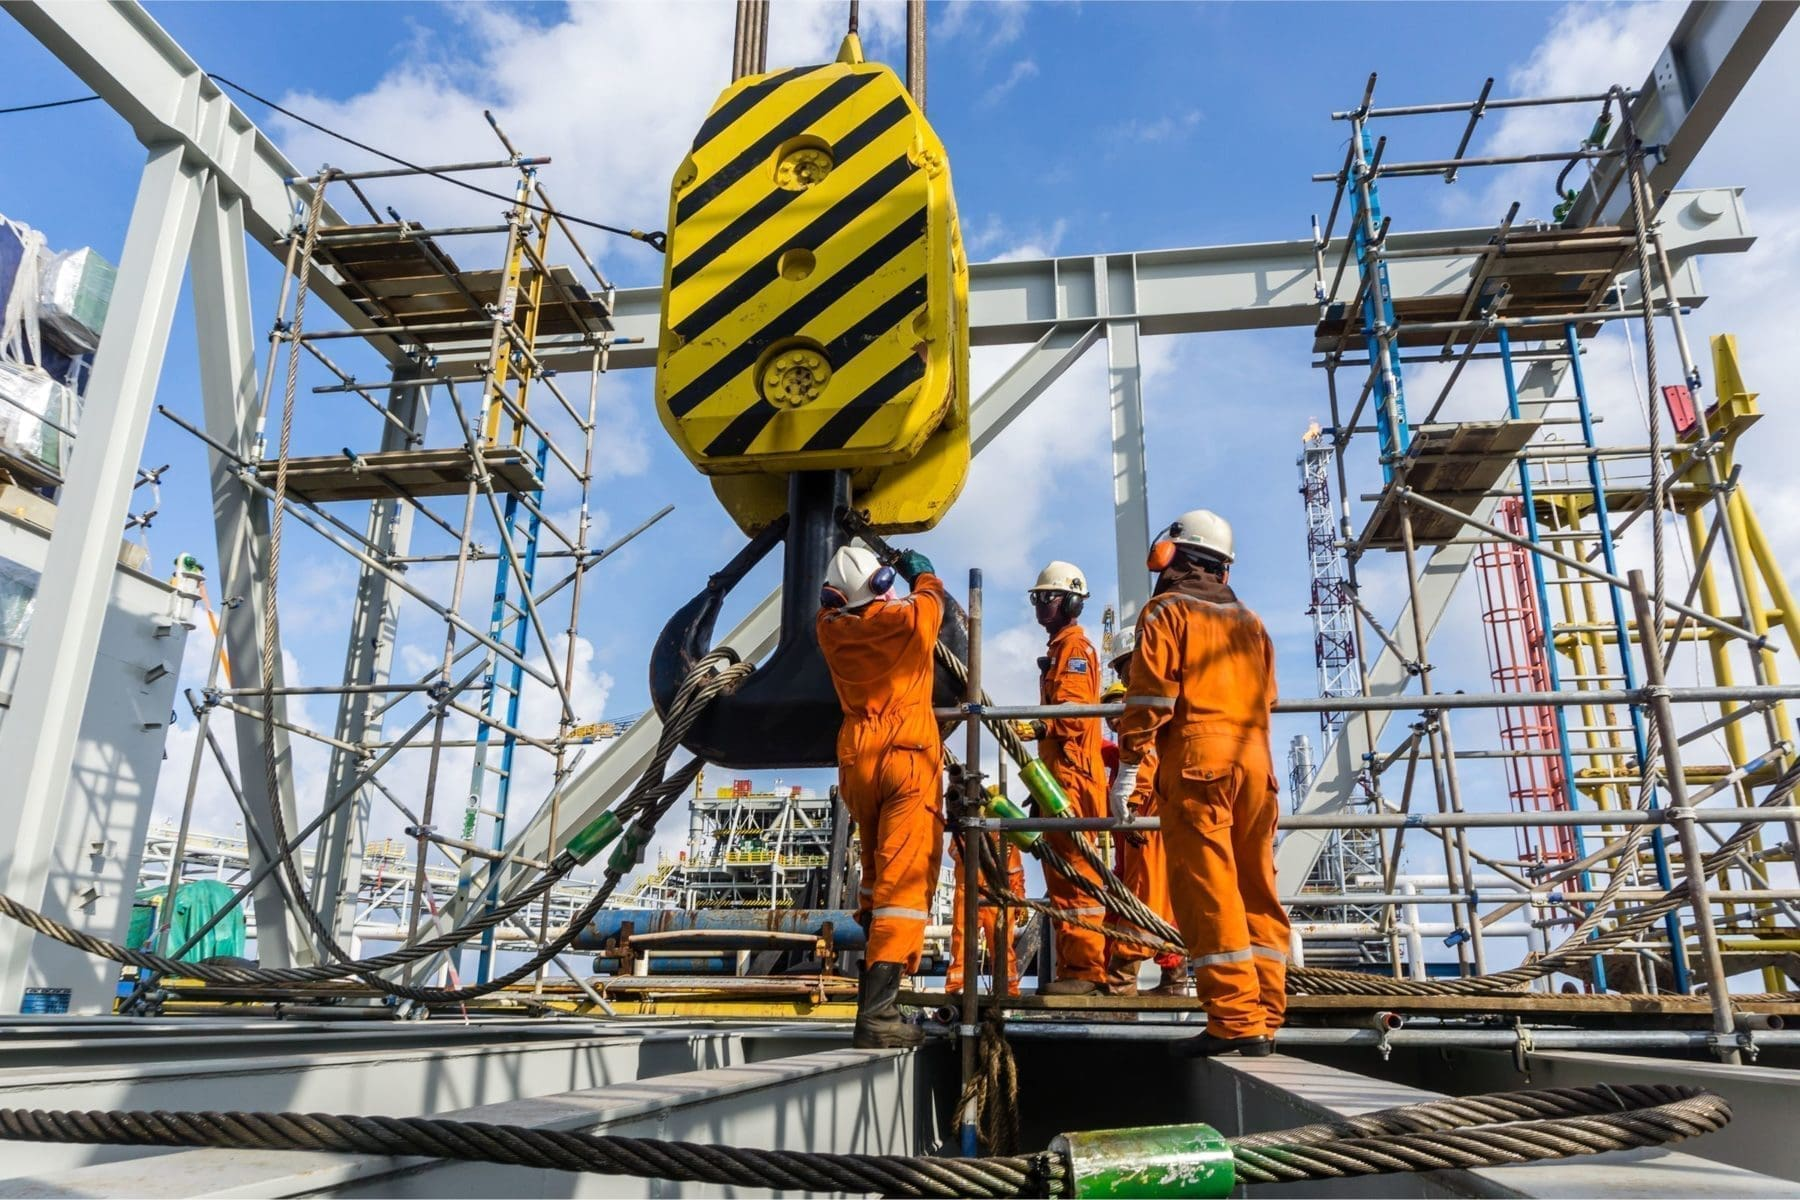
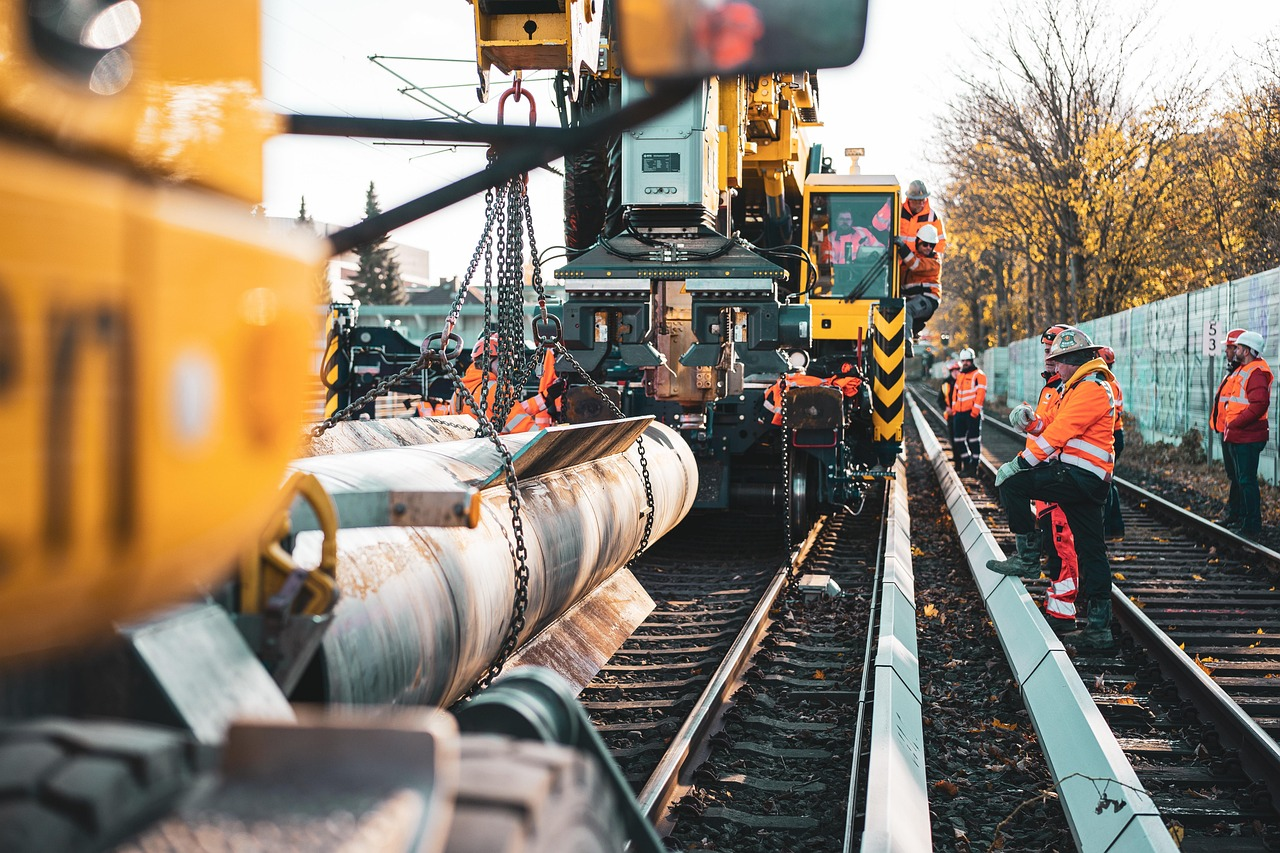
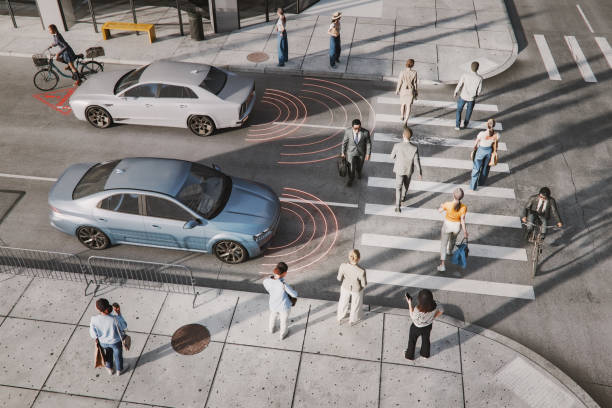

In [4]:
import base64
from PIL import Image
from IPython.display import display, HTML

# File paths and metadata
TEST_IMAGES = {
    "Construction": "./images/Construction.jpeg",
    "Crane": "./images/crane image.jpg",
    "Traffic": "./images/traffic.jpg"
}

MODELS = [
    "BLIP-2 VQA Base",
    "Florence-2 Base",
    "SmolVLM (500M)",
    "ViLT Base-32",
    "GIT-Base-TextVQA"
]

QUESTION = "Does the image show any hazards that could pose a threat to worker safety?"

# Response dictionary
RESPONSES = {
    "Construction": {
        "BLIP-2 VQA Base": "yes",
        "Florence-2 Base": "image show any hazards that could pose a threat to worker safety",
        "SmolVLM (500M)": "Yes, the image shows scaffolding, which could pose a risk to workers if not properly managed.",
        "ViLT Base-32": "yes",
        "GIT-Base-TextVQA": "does the image show any hazards that could pose a threat to worker safety? yes"
    },
    "Crane": {
        "BLIP-2 VQA Base": "yes",
        "Florence-2 Base": "image show any hazards that could pose a threat to worker safety",
        "SmolVLM (500M)": "Yes, the image shows workers wearing safety helmets, which may indicate that they are working in a hazardous environment, such as near tracks or railway tracks.",
        "ViLT Base-32": "yes",
        "GIT-Base-TextVQA": "does the image show any hazards that could pose a threat to worker safety? unanswerable"
    },
    "Traffic": {
        "BLIP-2 VQA Base": "yes",
        "Florence-2 Base": "image show any hazards that could pose a threat to worker safety safety",
        "SmolVLM (500M)": "Yes, there is a road roller in the image, which could pose a hazard to workers.",
        "ViLT Base-32": "yes",
        "GIT-Base-TextVQA": "does the image show any hazards that could pose a threat to worker safety? no"
    }
}

def image_to_base64(path):
    with open(path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")

# HTML render logic
html_content = "<h2>Model Responses to Safety Question</h2>"

for image_label, image_path in TEST_IMAGES.items():
    img_b64 = image_to_base64(image_path)
    html_content += f"""
    <hr>
    <h3>{image_label} Image</h3>
    <img src="data:image/jpeg;base64,{img_b64}" alt="{image_label}" style="width:400px; border:1px solid #ccc;"/><br>
    <strong>Question:</strong> {QUESTION}<br><br>
    <table style="border-collapse: collapse; width: 100%;">
        <tr>
            <th style="border: 1px solid #ccc; padding: 8px;">Model</th>
            <th style="border: 1px solid #ccc; padding: 8px;">Response</th>
        </tr>
    """

    for model in MODELS:
        response = RESPONSES[image_label][model]
        html_content += f"""
        <tr>
            <td style="border: 1px solid #ccc; padding: 8px;">{model}</td>
            <td style="border: 1px solid #ccc; padding: 8px;">{response}</td>
        </tr>
        """

    html_content += "</table><br>"

# Display in notebook
display(HTML(html_content))
